In [2]:
import pandas as pd
import mne
import sys
import numpy as np
from mne import Epochs, pick_types, find_events
from mne.io import read_raw_edf
from scipy.signal import butter, lfilter
from mne.io import concatenate_raws

In [3]:
runs = [3, 4, 7]
raw_data = mne.datasets.eegbci.load_data(1, runs)

    # get all the data needed in one
raw = concatenate_raws([read_raw_edf(data, preload=True) for data in raw_data])

Extracting EDF parameters from /Users/tonou/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/tonou/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/tonou/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [4]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>


Used Annotations descriptions: ['T1', 'T2']
Using matplotlib as 2D backend.


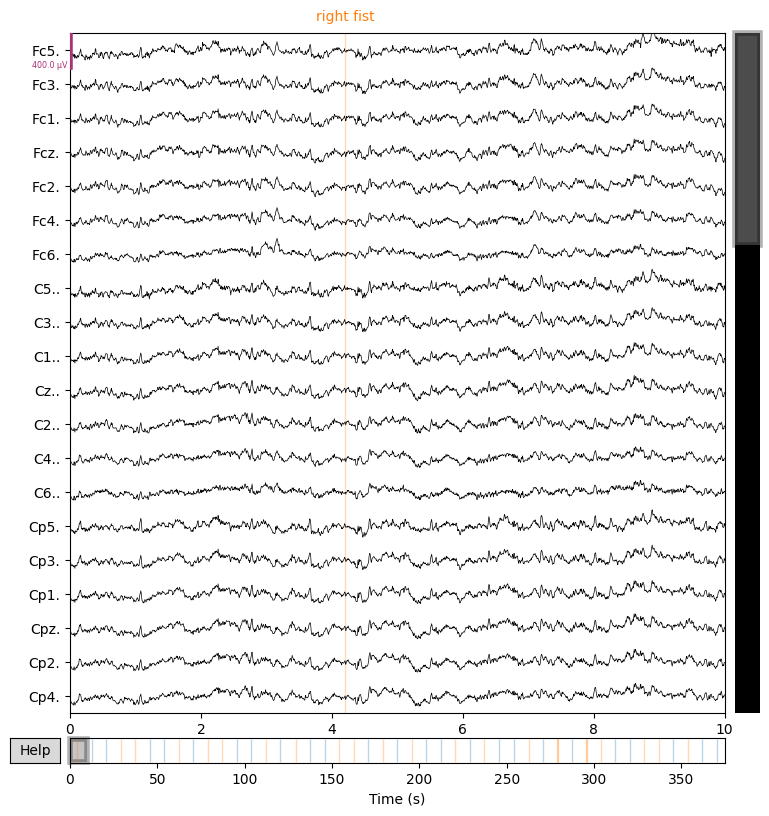

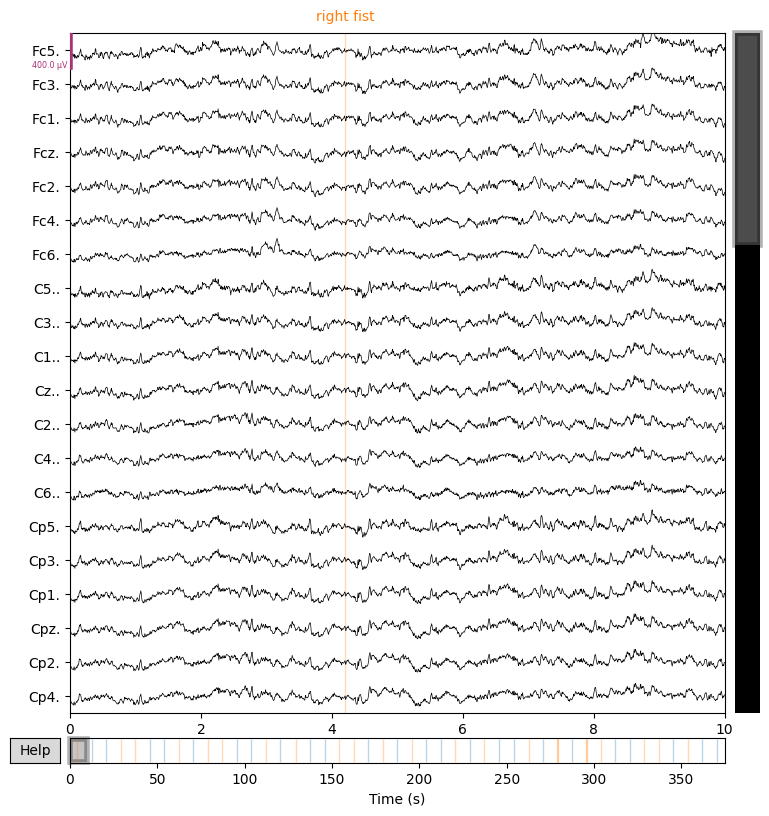

In [5]:
event_id = {'T1': 1, 'T2': 2}  # Define the event IDs
events, _ = mne.events_from_annotations(raw, event_id=event_id)
# Creating annotation from events
sfreq = raw.info["sfreq"]
event_desc = {0: "rest", 1: "left fist", 2: "right fist"}
annotations = mne.annotations_from_events(events=events, event_desc=event_desc, sfreq=sfreq)
# mne.annotations_from_events?
# set annotation dans le raw
raw = raw.set_annotations(annotations=annotations)
raw.plot(scalings=0.0002)

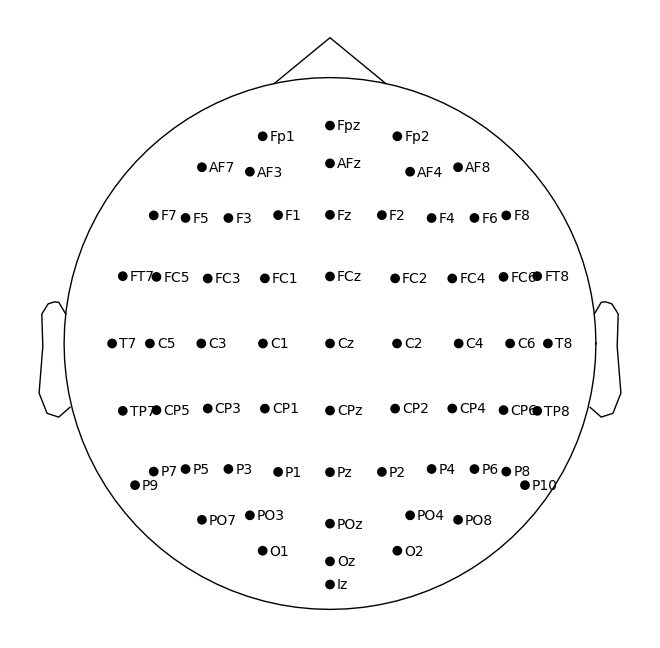

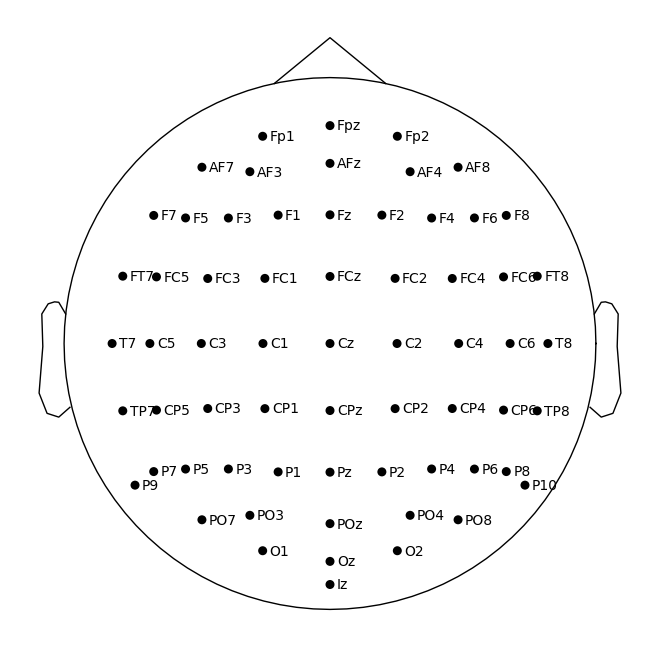

In [6]:
mne.datasets.eegbci.standardize(raw=raw)
montage = mne.channels.make_standard_montage('biosemi64') # 64 electrodes
raw.set_montage(montage, on_missing='ignore')
montage.plot()

Effective window size : 1.600 (s)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


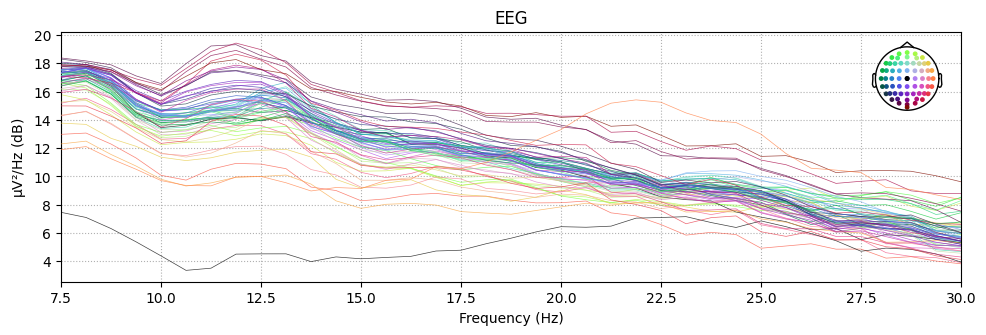

In [7]:
# picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True, stim=False)
spec = raw.compute_psd(fmin = 7, fmax= 30)
spec.plot()
# mne.minimum_norm.compute_source_psd?

64
Fitting ICA to data using 62 channels (please be patient, this may take a while)


/var/folders/94/r4d009393gs_9zw7pjldx8140000gn/T/ipykernel_2610/2291504695.py:6: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 62 components
Fitting ICA took 14.2s.
62


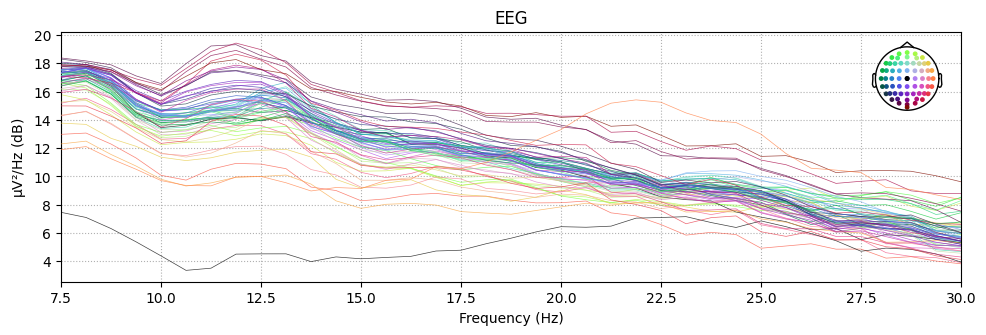

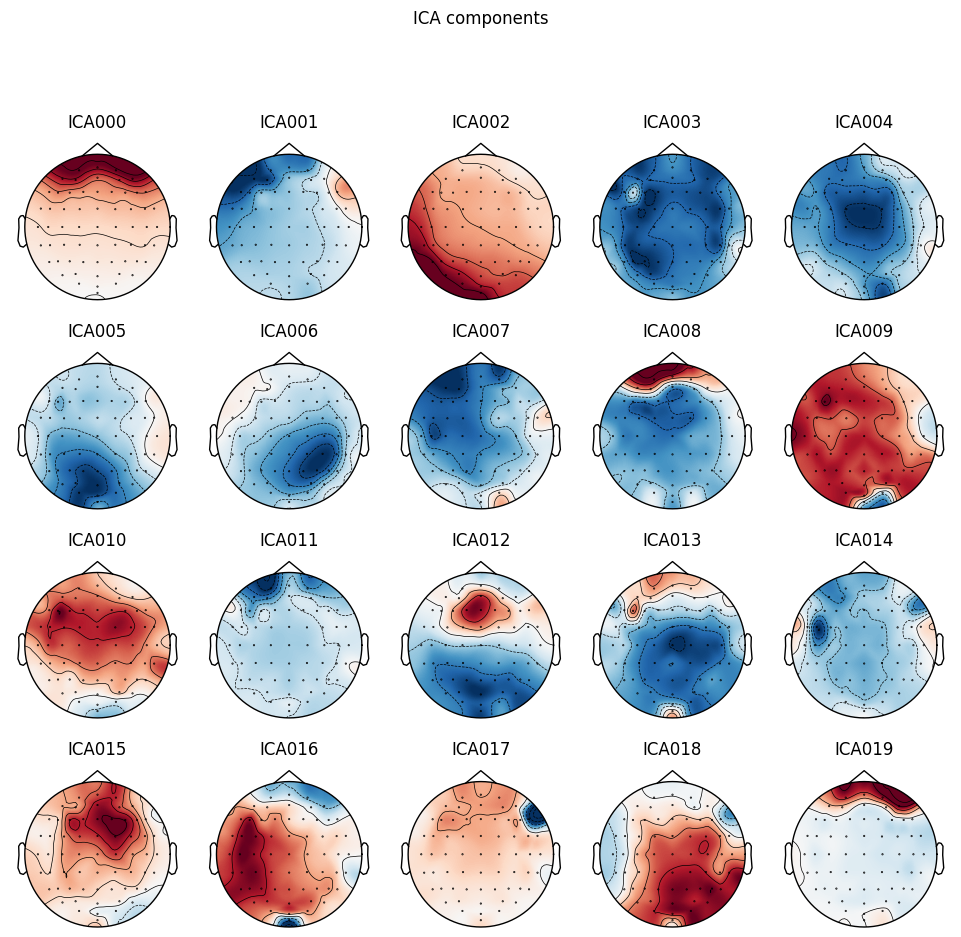

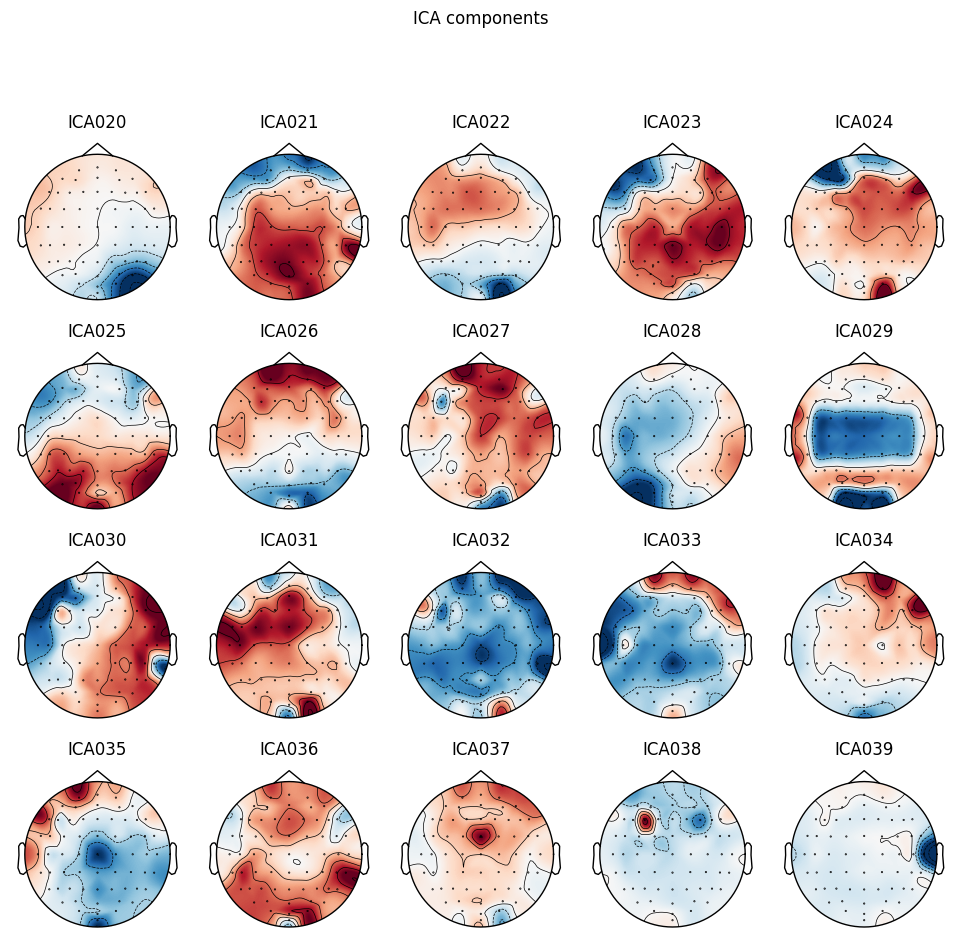

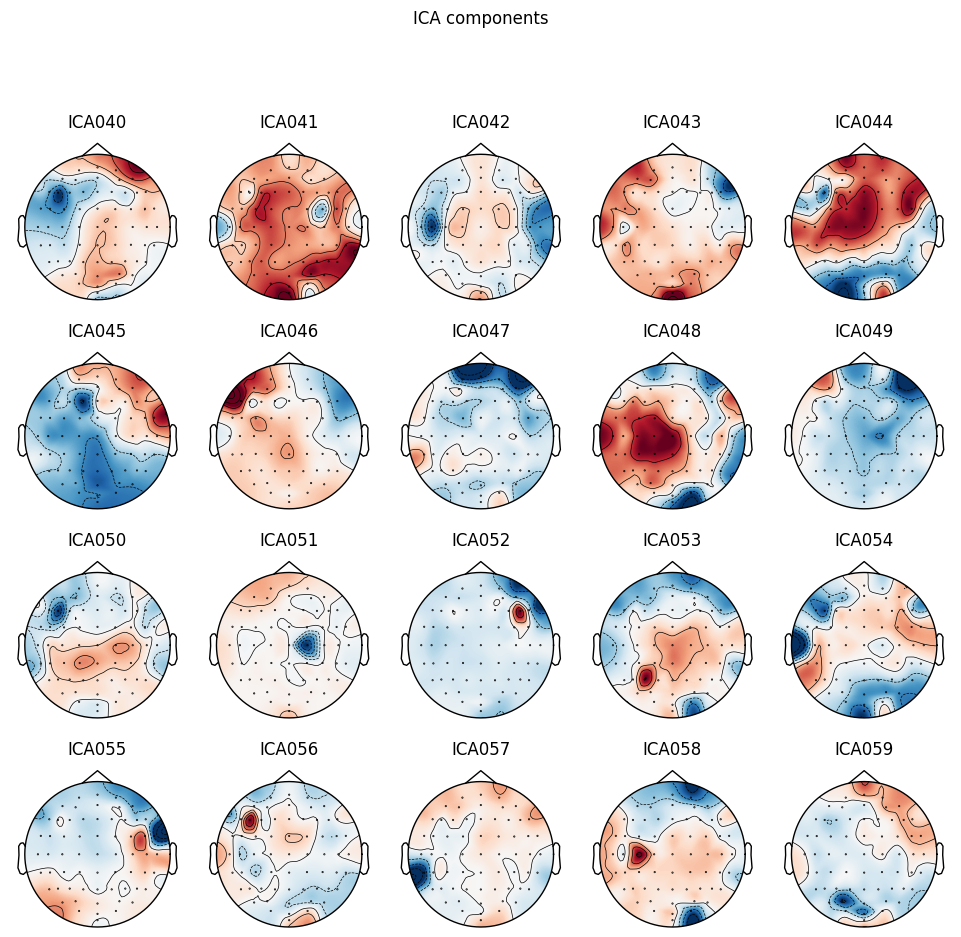

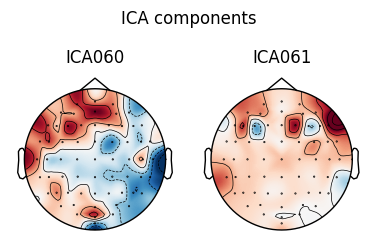

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 390x260.5 with 2 Axes>]

In [8]:
channels = raw.info["ch_names"]
print(len(channels))
ica = mne.preprocessing.ICA(n_components=len(channels) - 2, random_state=0)
channel_name = {'T9', 'T10'}
raw.drop_channels(ch_names=channel_name, on_missing='ignore')
ica.fit(raw)
print(len(raw.info["ch_names"]))
ica.plot_components(outlines='head')
# ica.plot_components?
